In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [120]:
pd.set_option('display.max_columns', 10)

In [121]:
data = pd.read_csv('../data/clean_data/data_v1.csv', index_col=0)
data.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,...,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,...,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,...,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,...,0,0,ME,3,23


In [3]:
pd.set_option('display.max_column', None)

In [35]:
data = data.loc[data['job_industry_recode'] != 'Not in universe, or children']
data = data.loc[data['school_enroll_lastweek'] != 'Not in univ. or children & Armed Forces']



In [38]:
data.employment.value_counts()

employment
1    52978
2     1841
0      390
Name: count, dtype: int64

In [57]:
columns_to_keep = ['job_industry_recode', 'highest_education', 'sex', 'age_recode_gt15', 'health_insurance_ly', 'fips', 'marital_status']

In [58]:
arm_data = data.loc[:,columns_to_keep]
arm_data.head()

,job_industry_recode,highest_education,sex,age_recode_gt15,health_insurance_ly,fips,marital_status
6,Sales and related occupations,Some College But No Degree,Male,50 to 54 years,Coverage for all of year,ME,Marr-civ sp present
10,Transportation and material moving occupations,High school graduate-high school diploma,Male,45 to 49 years,No Coverage,ME,Never married
12,Computer and mathematical science occupations,"Bachelor's degree (BA,AB,BS)",Male,22 to 24 years,Coverage for all of year,ME,Never married
29,Management occupations,"Master's degree (MA,MS,MENG,MED,MSW,MBA)",Female,35 to 39 years,Coverage for all of year,ME,Marr-civ sp present
30,Management occupations,Assc degree-academic program,Male,35 to 39 years,Coverage for all of year,ME,Marr-civ sp present


In [59]:
arm_data = pd.get_dummies(arm_data, dtype=int)
arm_data.head()

,job_industry_recode_Architecture and engineering occupations,job_industry_recode_Armed Forces,"job_industry_recode_Arts, design, entertainment, sports, and media occupations",job_industry_recode_Building and grounds cleaning and maintenance occupations,job_industry_recode_Business and financial operations occupations,job_industry_recode_Community and social service occupations,job_industry_recode_Computer and mathematical science occupations,job_industry_recode_Construction and extraction occupations,"job_industry_recode_Education, training, and library occupations","job_industry_recode_Farming, fishing, and forestry occupations",job_industry_recode_Food preparation and serving related occupations,job_industry_recode_Healthcare practitioner and technical occupations,job_industry_recode_Healthcare support occupations,"job_industry_recode_Installation, maintenance, and repair occupations",job_industry_recode_Legal occupations,"job_industry_recode_Life, physical, and social service occupations",job_industry_recode_Management occupations,job_industry_recode_Office and administrative support occupations,job_industry_recode_Personal care and service occupations,job_industry_recode_Production occupations,job_industry_recode_Protective service occupations,job_industry_recode_Sales and related occupations,job_industry_recode_Transportation and material moving occupations,highest_education_10th Grade,highest_education_11th Grade,highest_education_12th Grade No Diploma,"highest_education_1st,2nd,3rd,or 4th grade",highest_education_5th Or 6th Grade,highest_education_7th and 8th grade,highest_education_9th Grade,highest_education_Assc degree-academic program,highest_education_Assc degree-occupation/vocation,"highest_education_Bachelor's degree (BA,AB,BS)","highest_education_Doctorate degree (PHD,EDD)",highest_education_High school graduate-high school diploma,highest_education_Less Than 1st Grade,"highest_education_Master's degree (MA,MS,MENG,MED,MSW,MBA)","highest_education_Professional school degree (MD,DDS,DVM,L",highest_education_Some College But No Degree,sex_Female,sex_Male,age_recode_gt15_16 and 17 years,age_recode_gt15_18 and 19 years,age_recode_gt15_20 and 21 years,age_recode_gt15_22 to 24 years,age_recode_gt15_25 to 29 years,age_recode_gt15_30 to 34 years,age_recode_gt15_35 to 39 years,age_recode_gt15_40 to 44 years,age_recode_gt15_45 to 49 years,age_recode_gt15_50 to 54 years,health_insurance_ly_Coverage for all of year,health_insurance_ly_Coverage for some of year,health_insurance_ly_No Coverage,fips_AK,fips_AL,fips_AR,fips_AZ,fips_CA,fips_CO,fips_CT,fips_DC,fips_DE,fips_FL,fips_GA,fips_HI,fips_IA,fips_ID,fips_IL,fips_IN,fips_KS,fips_KY,fips_LA,fips_MA,fips_MD,fips_ME,fips_MI,fips_MN,fips_MO,fips_MS,fips_MT,fips_NC,fips_ND,fips_NE,fips_NH,fips_NJ,fips_NM,fips_NV,fips_NY,fips_OH,fips_OK,fips_OR,fips_PA,fips_RI,fips_SC,fips_SD,fips_TN,fips_TX,fips_UT,fips_VA,fips_VT,fips_WA,fips_WI,fips_WV,fips_WY,marital_status_Divorced,marital_status_Marr-AF spo present,marital_status_Marr-civ sp present,marital_status_Marr-spouse absent,marital_status_Never married,marital_status_Separated,marital_status_Widowed
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [60]:
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

In [122]:
arm_data.head()

,job_industry_recode_Architecture and engineering occupations,job_industry_recode_Armed Forces,"job_industry_recode_Arts, design, entertainment, sports, and media occupations",job_industry_recode_Building and grounds cleaning and maintenance occupations,job_industry_recode_Business and financial operations occupations,...,marital_status_Marr-civ sp present,marital_status_Marr-spouse absent,marital_status_Never married,marital_status_Separated,marital_status_Widowed
6,0,0,0,0,0,...,1,0,0,0,0
10,0,0,0,0,0,...,0,0,1,0,0
12,0,0,0,0,0,...,0,0,1,0,0
29,0,0,0,0,0,...,1,0,0,0,0
30,0,0,0,0,0,...,1,0,0,0,0


In [98]:
all_rules = apriori(arm_data, min_support=0.02, use_colnames=True)
association_rules_df = pd.DataFrame(association_rules(all_rules))

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [99]:
association_rules_df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(job_industry_recode_Business and financial operations occupations),(health_insurance_ly_Coverage for all of year),0.054792,0.865040,0.051767,0.944793,1.092196,0.004370,2.444633,0.089307
1,(job_industry_recode_Computer and mathematical science occupations),(health_insurance_ly_Coverage for all of year),0.040446,0.865040,0.038074,0.941335,1.088198,0.003086,2.300499,0.084466
2,(job_industry_recode_Construction and extraction occupations),(sex_Male),0.058632,0.517778,0.055860,0.952734,1.840044,0.025502,10.202307,0.484969
3,"(job_industry_recode_Education, training, and library occupations)",(health_insurance_ly_Coverage for all of year),0.064319,0.865040,0.060334,0.938046,1.084396,0.004696,2.178375,0.083177
4,(job_industry_recode_Healthcare practitioner and technical occupations),(health_insurance_ly_Coverage for all of year),0.064174,0.865040,0.060280,0.939317,1.085865,0.004767,2.224013,0.084498


In [100]:
top_15_support = association_rules_df.sort_values('support')
top_15_support = top_15_support[['antecedents', 'consequents', 'support']]
top_15_support.sort_values('support', ascending=False)[:15]

,antecedents,consequents,support
46,(marital_status_Marr-civ sp present),(health_insurance_ly_Coverage for all of year),0.461555
24,(sex_Male),(health_insurance_ly_Coverage for all of year),0.436958
23,(sex_Female),(health_insurance_ly_Coverage for all of year),0.428082
47,(marital_status_Never married),(health_insurance_ly_Coverage for all of year),0.309207
148,"(sex_Male, marital_status_Marr-civ sp present)",(health_insurance_ly_Coverage for all of year),0.242134
18,"(highest_education_Bachelor's degree (BA,AB,BS))",(health_insurance_ly_Coverage for all of year),0.230252
138,"(sex_Female, marital_status_Marr-civ sp present)",(health_insurance_ly_Coverage for all of year),0.219421
20,(highest_education_High school graduate-high school diploma),(health_insurance_ly_Coverage for all of year),0.208281
139,"(marital_status_Never married, sex_Female)",(health_insurance_ly_Coverage for all of year),0.150211
109,"(highest_education_Bachelor's degree (BA,AB,BS), marital_status_Marr-civ sp present)",(health_insurance_ly_Coverage for all of year),0.140321


In [101]:
top_15_lift = association_rules_df.sort_values('lift')
top_15_lift = top_15_lift[['antecedents', 'consequents', 'lift']]
top_15_lift.sort_values('lift', ascending=False)[:15]

,antecedents,consequents,lift
151,(age_recode_gt15_18 and 19 years),"(marital_status_Never married, health_insurance_ly_Coverage for all of year)",2.753880
25,(age_recode_gt15_16 and 17 years),(marital_status_Never married),2.594196
150,"(age_recode_gt15_18 and 19 years, health_insurance_ly_Coverage for all of year)",(marital_status_Never married),2.592506
27,(age_recode_gt15_18 and 19 years),(marital_status_Never married),2.591455
153,"(health_insurance_ly_Coverage for all of year, age_recode_gt15_20 and 21 years)",(marital_status_Never married),2.504456
29,(age_recode_gt15_20 and 21 years),(marital_status_Never married),2.490214
207,"(age_recode_gt15_22 to 24 years, sex_Male, health_insurance_ly_Coverage for all of year)",(marital_status_Never married),2.329041
140,"(age_recode_gt15_22 to 24 years, sex_Male)",(marital_status_Never married),2.323990
155,"(age_recode_gt15_22 to 24 years, health_insurance_ly_Coverage for all of year)",(marital_status_Never married),2.297858
31,(age_recode_gt15_22 to 24 years),(marital_status_Never married),2.286676


In [102]:
top_15_confidence = association_rules_df.sort_values('confidence')
top_15_confidence = top_15_confidence[['antecedents', 'consequents', 'confidence']]
top_15_confidence.sort_values('confidence', ascending=False)[:15]

,antecedents,consequents,confidence
25,(age_recode_gt15_16 and 17 years),(marital_status_Never married),0.977411
150,"(age_recode_gt15_18 and 19 years, health_insurance_ly_Coverage for all of year)",(marital_status_Never married),0.976774
27,(age_recode_gt15_18 and 19 years),(marital_status_Never married),0.976378
59,"(job_industry_recode_Education, training, and library occupations, highest_education_Master's degree (MA,MS,MENG,MED,MSW,MBA))",(health_insurance_ly_Coverage for all of year),0.970079
192,"(highest_education_Master's degree (MA,MS,MENG,MED,MSW,MBA), sex_Female, marital_status_Marr-civ sp present)",(health_insurance_ly_Coverage for all of year),0.967755
51,"(job_industry_recode_Business and financial operations occupations, marital_status_Marr-civ sp present)",(health_insurance_ly_Coverage for all of year),0.967688
122,"(highest_education_Master's degree (MA,MS,MENG,MED,MSW,MBA), marital_status_Marr-civ sp present)",(health_insurance_ly_Coverage for all of year),0.964974
169,"(job_industry_recode_Education, training, and library occupations, sex_Female, marital_status_Marr-civ sp present)",(health_insurance_ly_Coverage for all of year),0.964393
188,"(highest_education_Bachelor's degree (BA,AB,BS), marital_status_Marr-civ sp present, age_recode_gt15_50 to 54 years)",(health_insurance_ly_Coverage for all of year),0.964055
53,"(job_industry_recode_Computer and mathematical science occupations, marital_status_Marr-civ sp present)",(health_insurance_ly_Coverage for all of year),0.963515


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

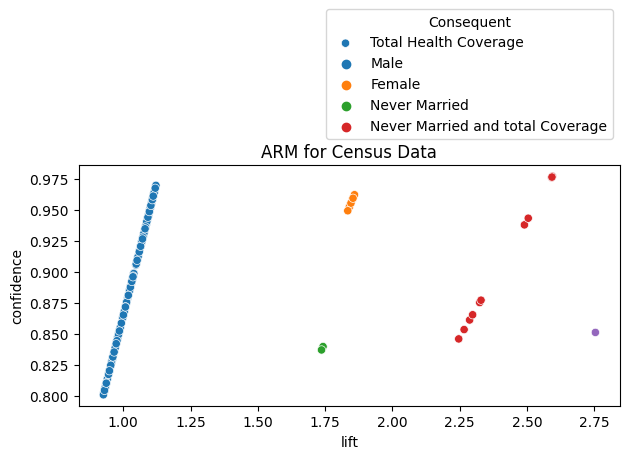

In [119]:
import seaborn as sns
sns.scatterplot(data = association_rules_df, x = 'lift', y = 'confidence', hue = 'consequents')
plt.title("ARM for Census Data")
plt.legend(bbox_to_anchor = (1,1.08), title = 'Consequent', loc = 'lower right', labels = ['Total Health Coverage', 'Male', 'Female', 'Never Married', 'Never Married and total Coverage'])
plt.tight_layout()
plt.savefig('../site_pages/plots/arm_analysis.png')
